# PCA - Support Vector Machines
- This notebook will explore different architectures and hyperparameters of the `Support Vector Machine` looking for an optimal configuration. In this case, the Dataset with a PCA dimensionality reduction will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [17]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed=42
Random.seed!(seed)

TaskLocalRNG()

In [18]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

## Loading data
- The dataset used in this notebook has been reduced using PCA dimensionality reduction.

In [19]:
file = h5open("pca_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
test_input = read(file, "test_input")
test_tags = read(file, "test_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [20]:
model = :SVM
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = [];

In [21]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
    Dict(:kernel => "rbf", :gamma => 1, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "rbf", :gamma => 2, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "poly", :gamma => 1, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "poly", :gamma => 2, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 2, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "sigmoid", :gamma => 1, :C => 1, :degree => 3, :random_state => seed),
    Dict(:kernel => "sigmoid", :gamma => 2, :C => 1, :degree => 3, :random_state => seed),
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc means -----
Hyperparams set 5 -> 0.926 ± 0.018
Hyperparams set 6 -> 0.926 ± 0.018
Hyperparams set 4 -> 0.758 ± 0.031
Hyperparams set 3 -> 0.754 ± 0.034
Hyperparams set 1 -> 0.679 ± 0.034
Hyperparams set 7 -> 0.549 ± 0.039
Hyperparams set 2 -> 0.47 ± 0.027
Hyperparams set 8 -> 0.434 ± 0.029

----- sensitivity means -----
Hyperparams set 5 -> 0.926 ± 0.018
Hyperparams set 6 -> 0.926 ± 0.018
Hyperparams set 4 -> 0.758 ± 0.031
Hyperparams set 3 -> 0.754 ± 0.034
Hyperparams set 1 -> 0.679 ± 0.034
Hyperparams set 7 -> 0.549 ± 0.039
Hyperparams set 2 -> 0.47 ± 0.027
Hyperparams set 8 -> 0.434 ± 0.029

----- specificity means -----
Hyperparams set 5 -> 0.975 ± 0.006
Hyperparam

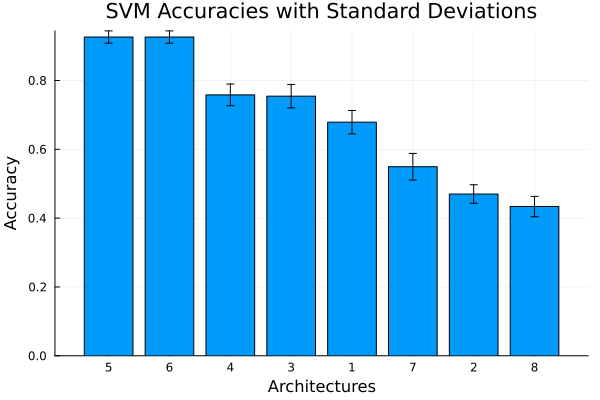

In [22]:
plot_acc_comparison(model, all_metrics)

### Discussion
In this first approach, is noticeable that the linear kernel give the best results in terms of accuracy.


### Testing Linear Kernel

In [23]:
hyperparameters = [
    Dict(:kernel => "linear", :gamma => 1, :C => 1, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 2, :C => 1, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 3, :C => 1, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 2, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 3, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 4, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>3, :random_state => seed),
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7

----- acc means -----
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.935 ± 0.015
Hyperparams set 4 -> 0.933 ± 0.011
Hyperparams set 5 -> 0.932 ± 0.014
Hyperparams set 1 -> 0.926 ± 0.018
Hyperparams set 2 -> 0.926 ± 0.018
Hyperparams set 3 -> 0.926 ± 0.018

----- sensitivity means -----
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.935 ± 0.015
Hyperparams set 4 -> 0.933 ± 0.011
Hyperparams set 5 -> 0.932 ± 0.014
Hyperparams set 1 -> 0.926 ± 0.018
Hyperparams set 2 -> 0.926 ± 0.018
Hyperparams set 3 -> 0.926 ± 0.018

----- specificity means -----
Hyperparams set 7 -> 0.98 ± 0.005
Hyperparams set 6 -> 0.978 ± 0.005
Hyperparams set 4 -> 0.977 ± 0.004
Hyperparams set 5 -> 0.977 ± 0.005
Hyperparams s

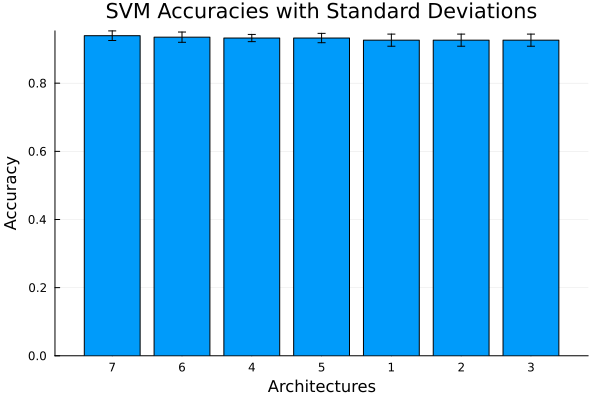

In [24]:
plot_acc_comparison(model, all_metrics)

### Discussion

A higher value of C, give the best results.

### Testing with C values

In [25]:
hyperparameters = [
    Dict(:kernel => "linear", :gamma => 1, :C => 1, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 2, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 3, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 4, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 6, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 7, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 8, :degree=>3, :random_state => seed),
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc means -----
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.938 ± 0.015
Hyperparams set 6 -> 0.937 ± 0.015
Hyperparams set 8 -> 0.936 ± 0.016
Hyperparams set 4 -> 0.935 ± 0.015
Hyperparams set 2 -> 0.933 ± 0.011
Hyperparams set 3 -> 0.932 ± 0.014
Hyperparams set 1 -> 0.926 ± 0.018

----- sensitivity means -----
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.938 ± 0.015
Hyperparams set 6 -> 0.937 ± 0.015
Hyperparams set 8 -> 0.936 ± 0.016
Hyperparams set 4 -> 0.935 ± 0.015
Hyperparams set 2 -> 0.933 ± 0.011
Hyperparams set 3 -> 0.932 ± 0.014
Hyperparams set 1 -> 0.926 ± 0.018

----- specificity means -----
Hyperparams set 5 -> 0.98 ± 0.005
Hyperpara

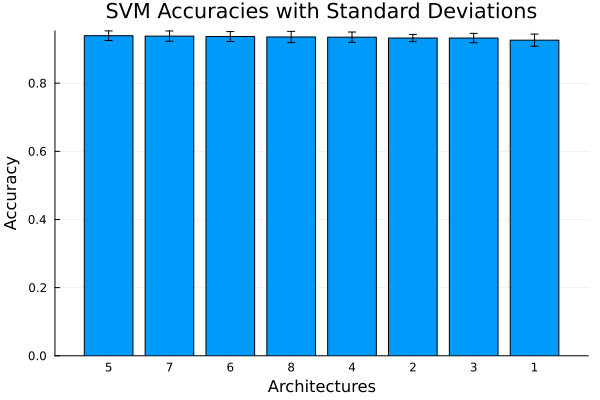

In [26]:
plot_acc_comparison(model, all_metrics)

### Discussion

With C=5, we obtain the best results

### Testing Degree value

In [27]:
hyperparameters = [
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>2, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>3, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>4, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>5, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>6, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>7, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>8, :random_state => seed),
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc means -----
Hyperparams set 1 -> 0.939 ± 0.014
Hyperparams set 2 -> 0.939 ± 0.014
Hyperparams set 3 -> 0.939 ± 0.014
Hyperparams set 4 -> 0.939 ± 0.014
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 8 -> 0.939 ± 0.014

----- sensitivity means -----
Hyperparams set 1 -> 0.939 ± 0.014
Hyperparams set 2 -> 0.939 ± 0.014
Hyperparams set 3 -> 0.939 ± 0.014
Hyperparams set 4 -> 0.939 ± 0.014
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 8 -> 0.939 ± 0.014

----- specificity means -----
Hyperparams set 1 -> 0.98 ± 0.005
Hyperpara

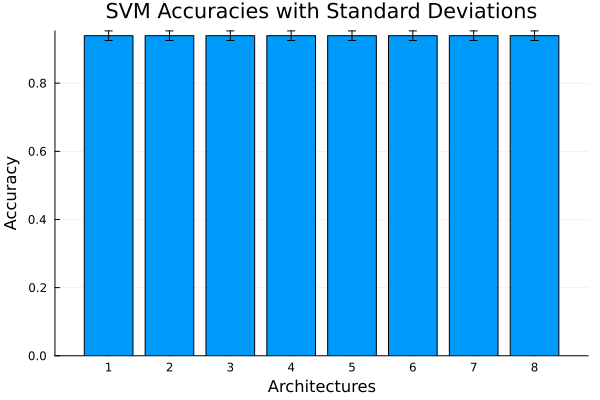

In [28]:
plot_acc_comparison(model, all_metrics)

The degree value does not seem to affect the performance of the model

## Testing gamma values

- At the end...

In [29]:
hyperparameters = [
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 2, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 3, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 4, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 5, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 6, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 7, :C => 5, :degree=>1, :random_state => seed),
    Dict(:kernel => "linear", :gamma => 8, :C => 5, :degree=>1, :random_state => seed),
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8

----- acc means -----
Hyperparams set 1 -> 0.939 ± 0.014
Hyperparams set 2 -> 0.939 ± 0.014
Hyperparams set 3 -> 0.939 ± 0.014
Hyperparams set 4 -> 0.939 ± 0.014
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 8 -> 0.939 ± 0.014

----- sensitivity means -----
Hyperparams set 1 -> 0.939 ± 0.014
Hyperparams set 2 -> 0.939 ± 0.014
Hyperparams set 3 -> 0.939 ± 0.014
Hyperparams set 4 -> 0.939 ± 0.014
Hyperparams set 5 -> 0.939 ± 0.014
Hyperparams set 6 -> 0.939 ± 0.014
Hyperparams set 7 -> 0.939 ± 0.014
Hyperparams set 8 -> 0.939 ± 0.014

----- specificity means -----
Hyperparams set 1 -> 0.98 ± 0.005
Hyperpara

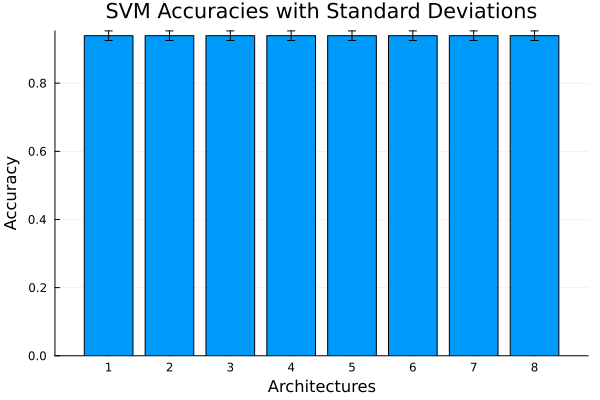

In [30]:
plot_acc_comparison(model, all_metrics)

### Discussion
The gamma value does not seem to affect

### Final Model

In [31]:
hyperparameters = [
    Dict(:kernel => "linear", :gamma => 1, :C => 5, :degree=>1, :random_state => seed),
]

all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

Training with set of hyperparameters 1

----- acc means -----
Hyperparams set 1 -> 0.939 ± 0.014

----- sensitivity means -----
Hyperparams set 1 -> 0.939 ± 0.014

----- specificity means -----
Hyperparams set 1 -> 0.98 ± 0.005

----- ppv means -----
Hyperparams set 1 -> 0.941 ± 0.014

----- npv means -----
Hyperparams set 1 -> 0.979 ± 0.005

----- f_score means -----
Hyperparams set 1 -> 0.939 ± 0.014

----- err_rate -----
Hyperparams set 1 -> 0.061 ± 0.014


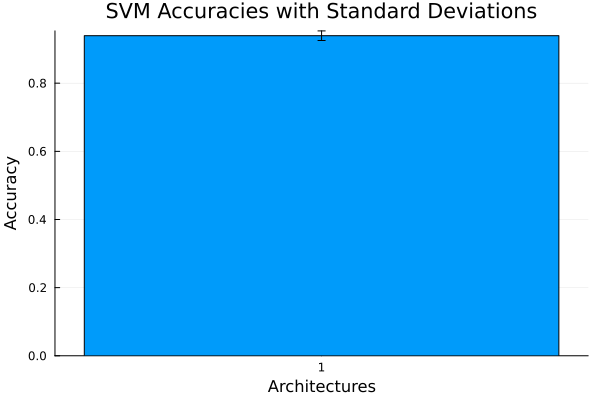

In [32]:
plot_acc_comparison(model, all_metrics)

## Final discussion

Finally, as can be seen in the graph below, the results obtained in both experiments are quite close, being both very high accuracies. Nonetheless, the model with a higher accuracy score has been obtained in the first experiment, with the following hyperparameters:

    1. kernel: linear
    2. gamma: 1
    3. C: 5
    4. degree: 1

All of this results in an accuracy of **0.939 ± 0.014**.

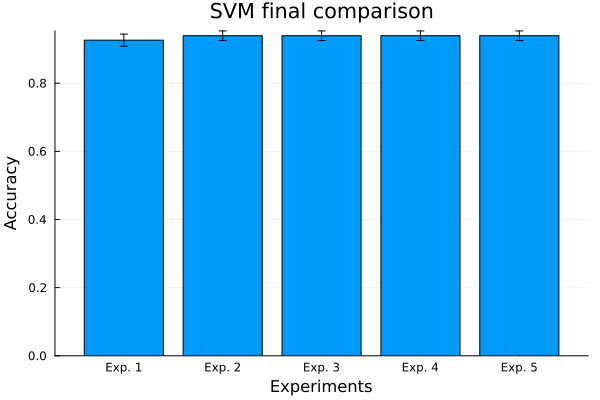

In [34]:
plot_final_comparison("SVM final comparison", best_models_acc)